In [1]:
#Dependencies and Set up 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Study data files
Vaccine_df = "Vaccination.csv"
# Read the mouse data and the study results
Vaccine_df = pd.read_csv(Vaccine_df, low_memory=False)
Vaccine_df

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/03/2023,48493,18,Wilson County,TX,98.9,31351.0,61.4,31233.0,65.0,...,38908.0,8411.0,5288.0,11.0,5232.0,12.1,5121.0,13.2,2707.0,32.2
1,05/03/2023,17123,18,Marshall County,IL,97.7,7190.0,62.9,7173.0,66.3,...,9119.0,2700.0,1734.0,16.0,1724.0,17.4,1702.0,18.7,1132.0,41.9
2,05/03/2023,54087,18,Roane County,WV,97.1,7574.0,55.3,7568.0,57.9,...,10907.0,3120.0,1401.0,10.7,1396.0,11.6,1373.0,12.6,821.0,26.3
3,05/03/2023,20121,18,Miami County,KS,93.9,19333.0,56.5,19205.0,59.7,...,25868.0,5841.0,4536.0,14.1,4486.0,15.5,4376.0,16.9,2517.0,43.1
4,05/03/2023,19103,18,Johnson County,IA,97.3,129587.0,85.7,126748.0,89.0,...,121138.0,18565.0,47497.0,33.3,45767.0,35.0,43219.0,35.7,14825.0,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959493,12/13/2020,46017,51,Buffalo County,SD,0.0,0.0,0.0,NaN,NaN,...,1203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959494,12/13/2020,13271,51,Telfair County,GA,0.0,0.0,0.0,NaN,NaN,...,13318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959495,12/13/2020,48297,51,Live Oak County,TX,0.0,0.0,0.0,NaN,NaN,...,9786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959496,12/13/2020,13289,51,Twiggs County,GA,0.0,0.0,0.0,NaN,NaN,...,6558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
Vaccine_df = Vaccine_df.dropna(subset=['Recip_State'])


In [3]:
Vaccine_df2 = Vaccine_df.groupby('Recip_State')['Completeness_pct'].mean().to_frame()
Vaccine_df2.head()

,Completeness_pct
Recip_State,
AK,91.727158
AL,86.556107
AR,84.379673
AS,0.000000
AZ,93.140570


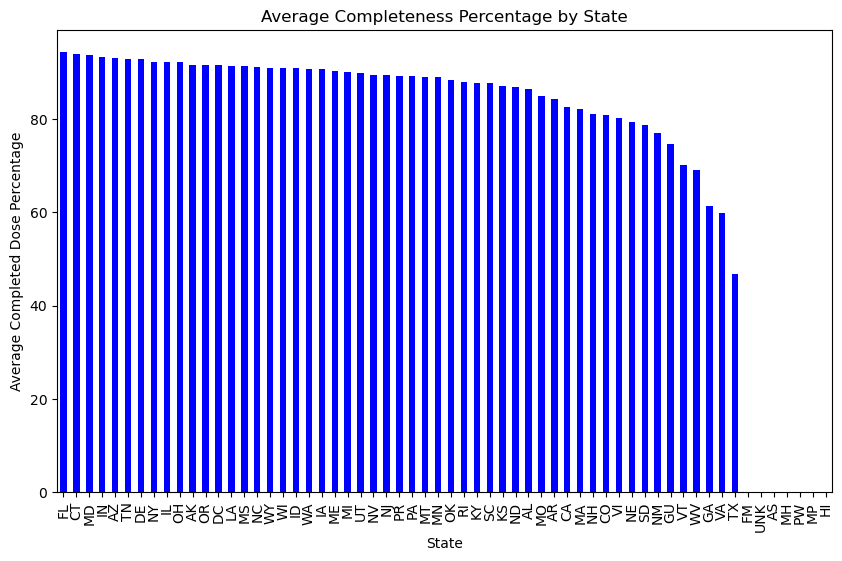

In [4]:
Vaccine_df2 = Vaccine_df2.sort_values('Completeness_pct', ascending=False)

plt.figure(figsize=(10,6))  

Vaccine_df2['Completeness_pct'].plot(kind='bar', color='blue')

plt.title('Average Completeness Percentage by State')  
plt.xlabel('State') 
plt.ylabel('Average Completed Dose Percentage')  

plt.show() 

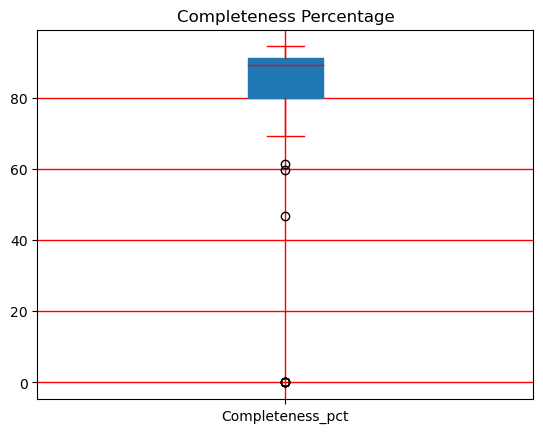

In [29]:
boxplot = Vaccine_df2.boxplot(grid=True,  
                              vert=True,  
                              notch=False,   
                              patch_artist=True)
for median in boxplot.findobj(plt.Line2D):
    median.set_color('red')
    median.set_linewidth(1)

plt.title('Completeness Percentage')
plt.show()    